<a href="https://colab.research.google.com/github/Dennis-fast-ai/unpackAI/blob/main/MNIST_In_Depth.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#hide
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 727kB 10.4MB/s 
     |████████████████████████████████| 1.2MB 41.5MB/s 
     |████████████████████████████████| 51kB 8.0MB/s 
     |████████████████████████████████| 204kB 51.8MB/s 
     |████████████████████████████████| 51kB 8.3MB/s 
     |████████████████████████████████| 61kB 8.6MB/s 
Mounted at /content/gdrive


In [ ]:
#hide
from fastai.vision.all import *
from fastbook import *

matplotlib.rc('image', cmap='Greys')

Time Stamp 1:05 Lesson 3

In [ ]:
path = untar_data(URLs.MNIST_SAMPLE)

In [ ]:
Path.BASE_PATH = path

In [ ]:
path.ls()

(#3) [Path('valid'),Path('train'),Path('labels.csv')]

In [ ]:
type(path)

pathlib.PosixPath

In [ ]:
doc(path.ls)

In [ ]:
(path/'train').ls()

(#2) [Path('train/7'),Path('train/3')]

In [ ]:
threes = (path/'train'/'3').ls().sorted()
sevens = (path/'train'/'7').ls().sorted()
threes

(#6131) [Path('train/3/10.png'),Path('train/3/10000.png'),Path('train/3/10011.png'),Path('train/3/10031.png'),Path('train/3/10034.png'),Path('train/3/10042.png'),Path('train/3/10052.png'),Path('train/3/1007.png'),Path('train/3/10074.png'),Path('train/3/10091.png')...]

In [ ]:
im3_path = threes[1]
im3 = Image.open(im3_path)
im3

In [ ]:
im3.shape

(28, 28)

In [ ]:
array(im3)[4:10,4:10]

array([[  0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,  29],
       [  0,   0,   0,  48, 166, 224],
       [  0,  93, 244, 249, 253, 187],
       [  0, 107, 253, 253, 230,  48],
       [  0,   3,  20,  20,  15,   0]], dtype=uint8)

In [ ]:
tensor(im3)[4:10,4:10]

tensor([[  0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,  29],
        [  0,   0,   0,  48, 166, 224],
        [  0,  93, 244, 249, 253, 187],
        [  0, 107, 253, 253, 230,  48],
        [  0,   3,  20,  20,  15,   0]], dtype=torch.uint8)

In [ ]:
im3_t = tensor(im3)
df = pd.DataFrame(im3_t[4:26,4:22])
df.style.set_properties(**{'font-size':'6pt'}).background_gradient('Greys')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,29,150,195,254,255,254,176,193,150,96,0,0,0
2,0,0,0,48,166,224,253,253,234,196,253,253,253,253,233,0,0,0
3,0,93,244,249,253,187,46,10,8,4,10,194,253,253,233,0,0,0
4,0,107,253,253,230,48,0,0,0,0,0,192,253,253,156,0,0,0
5,0,3,20,20,15,0,0,0,0,0,43,224,253,245,74,0,0,0
6,0,0,0,0,0,0,0,0,0,0,249,253,245,126,0,0,0,0
7,0,0,0,0,0,0,0,14,101,223,253,248,124,0,0,0,0,0
8,0,0,0,0,0,11,166,239,253,253,253,187,30,0,0,0,0,0
9,0,0,0,0,0,16,248,250,253,253,253,253,232,213,111,2,0,0


In [ ]:
type(im3)

PIL.PngImagePlugin.PngImageFile

In [ ]:
seven_tensors = [tensor(Image.open(o)) for o in sevens]
three_tensors = [tensor(Image.open(o)) for o in threes]
len(three_tensors),len(seven_tensors)

(6131, 6265)

In [ ]:
type(seven_tensors)

list

# Lists

In [ ]:
m_l = []
for i in range(1,11):
  m_l.append(i)
print(m_l)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


In [ ]:
m_l[0]

1

In [ ]:
type(m_l)

list

In [ ]:
numbers=[1, 2, 3, 4, 5, 6, 7]

In [ ]:
def challenge1():
  numbers=[1, 2, 3, 4, 5, 6, 7]
  double = [item*2 for item in numbers]
  print("numbers ", numbers)
  print('V')
challenge1()

numbers  [1, 2, 3, 4, 5, 6, 7]
V


In [ ]:
def challenge2():
  numbers=[1, 2, 3, 4, 5, 6, 7]
  squared = [item**2 for item in numbers]
  print("Numbers ", numbers)
  print("Squared ",squared)
challenge2()

Numbers  [1, 2, 3, 4, 5, 6, 7]
Squared  [1, 4, 9, 16, 25, 36, 49]


In [ ]:
def challenge3():
  numbers=[1, 2, 3, 4, 5, 6, 7]
  even = [item for item in numbers if item%2==0]
  print("Numbers ",numbers)
  print("Evens ",even)
challenge3()


Numbers  [1, 2, 3, 4, 5, 6, 7]
Evens  [2, 4, 6]


In [ ]:
def challenge4():
  numbers=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]
  fives = [str(item) for item in numbers if item%5==0]
  print("Numbers ",numbers)
  print("Fives ",fives)
challenge4()

Numbers  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]
Fives  ['5', '10', '15']


In [ ]:
def challenge5():
  sentence='The quick red fox jumped over the lazy brown dog and ran off into the forest'
  notThe = [len(item) for item in sentence.split() if item != "The"]
  print(sentence)
  print(notThe)
challenge5()

The quick red fox jumped over the lazy brown dog and ran off into the forest
[5, 3, 3, 6, 4, 3, 4, 5, 3, 3, 3, 3, 4, 3, 6]


In [ ]:
def challenge6():
  sentence='The quick red fox jumped over the lazy brown dog and ran off into the forest'
  vowles='aeiou'
  notVowles=[item for item in sentence if item not in vowles]
  print(sentence)
  print(''.join(notVowles))
challenge6()

The quick red fox jumped over the lazy brown dog and ran off into the forest
Th qck rd fx jmpd vr th lzy brwn dg nd rn ff nt th frst


In [ ]:
def challenge7():
  sentence='The quick red fox jumped over the lazy brown dog and ran off into the forest'
  plus1 = [chr(ord(item)+1) if item != ' ' and item < 'y' else item for item in sentence]
  print(sentence)
  print(''.join(plus1))
challenge7()

The quick red fox jumped over the lazy brown dog and ran off into the forest
Uif rvjdl sfe gpy kvnqfe pwfs uif mbzy cspxo eph boe sbo pgg joup uif gpsftu


In [ ]:
def challenge8():
  fruit = ['apple', 'banana', 'orange', 'pineapple', 'passion fruit']
  fruitDict={item:len(item) for item in fruit}
  print(fruit)
  print(fruitDict)
challenge8()


['apple', 'banana', 'orange', 'pineapple', 'passion fruit']
{'apple': 5, 'banana': 6, 'orange': 6, 'pineapple': 9, 'passion fruit': 13}


# Continue MNIST

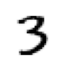

In [ ]:
show_image(three_tensors[1]);

In [ ]:
three_tensors[1].shape

torch.Size([28, 28])

In [ ]:
type(three_tensors)

list

In [ ]:
stacked_sevens = torch.stack(seven_tensors).float()/255
stacked_threes = torch.stack(three_tensors).float()/255
stacked_threes.shape

torch.Size([6131, 28, 28])

In [ ]:
type(stacked_threes)

torch.Tensor

In [ ]:
len(stacked_threes.shape)

3

In [ ]:
stacked_threes.ndim

3

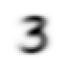

In [ ]:
mean3 = stacked_threes.mean(0)
show_image(mean3);

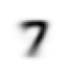

In [ ]:
mean7 = stacked_sevens.mean(0)
show_image(mean7);

In [ ]:
mean3.shape

torch.Size([28, 28])

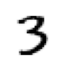

In [ ]:
a_3 = stacked_threes[1]
show_image(a_3);

In [ ]:
a_3.shape

torch.Size([28, 28])

In [ ]:
#1
#L1 norm (the distance from the ideal 3)
dist_3_abs = (a_3 - mean3).abs().mean()
dist_3_abs

tensor(0.1114)

In [ ]:
#2
#L1 norm alt syntax (dist from the ideal 3)
F.l1_loss(a_3.float(),mean3)

tensor(0.1114)

In [ ]:
#3
#L2 norm (the distance from the ideal 3 RMSE Root Mean Square Error)
dist_3_sqr = ((a_3 - mean3)**2).mean().sqrt()
dist_3_sqr

tensor(0.2021)

In [ ]:
#4
#L2 norm alt syntax (RMSE dist from ideal 3)
F.mse_loss(a_3,mean3).sqrt()

tensor(0.2021)

In [ ]:
#5
#L1 norm (distance from the ideal 7)
dist_7_abs = (a_3 - mean7).abs().mean()
dist_7_abs

tensor(0.1586)

In [ ]:
#6
#L1 norm alt syntax (dist from ideal 7)
F.l1_loss(a_3.float(),mean7)

tensor(0.1586)

In [ ]:
#7
#L2 norm (RMSE distance 3 to ideal 7)
dist_7_sqr = ((a_3 - mean7)**2).mean().sqrt()
dist_7_sqr

tensor(0.3021)

In [ ]:
#8
#L2 norm alt syntax (RMSE distance to ideal 7)
F.mse_loss(a_3,mean7).sqrt()

tensor(0.3021)

In [ ]:
data = [[1,2,3],[4,5,6]]
arr = array (data)
tns = tensor(data)

In [ ]:
arr #numpy - can be differnt sizes in the arrays

array([[1, 2, 3],
       [4, 5, 6]])

In [ ]:
tns #pytorch - must be the same shape

tensor([[1, 2, 3],
        [4, 5, 6]])

In [ ]:
tns[1] #slicing a tensor horizontal in this case 

tensor([4, 5, 6])

In [ ]:
tns[:,1]  #slicing a tensor vertically in this case

tensor([2, 5])

tensor calculations +, -, *, /, etc

In [ ]:
tns+5

tensor([[ 6,  7,  8],
        [ 9, 10, 11]])

In [ ]:
tns**2*1.25

tensor([[ 1.2500,  5.0000, 11.2500],
        [20.0000, 31.2500, 45.0000]])

In [ ]:
tns+tns

tensor([[ 2,  4,  6],
        [ 8, 10, 12]])

In [ ]:
tns*2

tensor([[ 2,  4,  6],
        [ 8, 10, 12]])

In [ ]:
tns.type()

'torch.LongTensor'

In [ ]:
tns*1.5

tensor([[1.5000, 3.0000, 4.5000],
        [6.0000, 7.5000, 9.0000]])

In [ ]:
tns.type()

'torch.LongTensor'

In [ ]:
valid_3_tens = torch.stack([tensor(Image.open(o))
                            for o in (path/'valid'/'3').ls()])
valid_3_tens = valid_3_tens.float()/255
valid_7_tens = torch.stack([tensor(Image.open(o))
                            for o in (path/'valid'/'7').ls()])
valid_7_tens = valid_7_tens.float()/255
valid_3_tens.shape,valid_7_tens.shape

(torch.Size([1010, 28, 28]), torch.Size([1028, 28, 28]))

In [ ]:
def mnist_distance(a,b): return (a-b).abs().mean((-1,-2))
mnist_distance(a_3, mean3)

tensor(0.1114)

Pytorch broadcasts the smaller rank tensor to match the larger rank to complete a calculation

In [ ]:
valid_3_dist = mnist_distance(valid_3_tens, mean3)
valid_3_dist, valid_3_dist.shape

(tensor([0.1107, 0.1180, 0.1203,  ..., 0.1111, 0.1259, 0.1314]),
 torch.Size([1010]))

In [ ]:
tensor([2,3,4,5]) ** tensor(4)

tensor([ 16,  81, 256, 625])

In [ ]:
valid_3_tens.shape

torch.Size([1010, 28, 28])

In [ ]:
mean3.shape

torch.Size([28, 28])

In [ ]:
(valid_3_tens-mean3).shape

torch.Size([1010, 28, 28])

In [ ]:
def is_3(x): return mnist_distance(x,mean3) < mnist_distance(x,mean7)

In [ ]:
is_3(a_3), is_3(a_3).float()

(tensor(True), tensor(1.))

In [ ]:
is_3(valid_3_tens)

tensor([ True,  True,  True,  ...,  True, False,  True])

In [ ]:
accuracy_3s = is_3(valid_3_tens).float().mean()
accuracy_7s = (1-is_3(valid_7_tens).float()).mean()

accuracy_3s,accuracy_7s,(accuracy_3s+accuracy_7s)/2

(tensor(0.9168), tensor(0.9854), tensor(0.9511))

SGD - Stochastic Gradient Descent

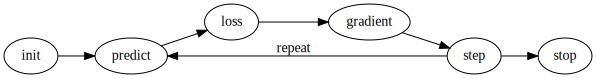

In [ ]:
gv('''
init->predict->loss->gradient->step->stop
step->predict[label=repeat]
''')

/usr/local/lib/python3.7/dist-packages/fastbook/__init__.py:73: UserWarning: Not providing a value for linspace's steps is deprecated and will throw a runtime error in a future release. This warning will appear only once per process. (Triggered internally at  /pytorch/aten/src/ATen/native/RangeFactories.cpp:23.)
  x = torch.linspace(min,max)


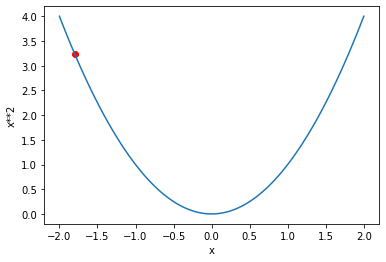

In [ ]:
def f(x): return x**2
plot_function(f, "x", "x**2")
plt.scatter(-1.8, f(-1.8), color='red')

In [ ]:
xt = tensor(3.).requires_grad_() #_ at the end means modify in place

In [ ]:
yt = f(xt)
yt

tensor(9., grad_fn=<PowBackward0>)

In [ ]:
yt.backward()

In [ ]:
xt.grad  #the derivative of x**@ is 2*x, xt was 3 so xt grad is the derivative 3*x = 6

tensor(6.)

In [ ]:
xt = tensor([3.,4.,10.]).requires_grad_()
xt

tensor([ 3.,  4., 10.], requires_grad=True)

In [ ]:
def f(x): return (x**2).sum()

yt = f(xt)
yt

tensor(125., grad_fn=<SumBackward0>)

In [ ]:
yt.backward()
xt.grad

tensor([ 6.,  8., 20.])

Stepping with a learning rate : time stamp 1:52

In [ ]:
time = torch.arange(0,20).float(); time

tensor([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14., 15., 16., 17., 18., 19.])

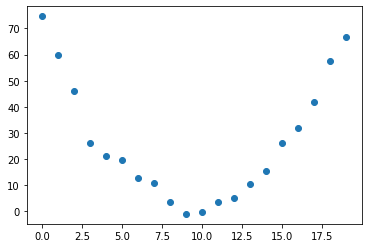

In [ ]:
speed = torch.randn(20)*3.1 + 0.75*(time-9.5)**2 + 1
plt.scatter(time,speed);

Speed of the roller coaster is a function of the form `a*(time**2)+(b*time)+c`.

In [ ]:
def f(t, params):
    a,b,c = params
    return a*(t**2) + (b*t) + c

In [ ]:
def mse(preds, targets): return ((preds-targets)**2).mean().sqrt()

In [ ]:
params = torch.randn(3).requires_grad_()  #assigne random values to a,b and C
orig_params = params.clone()

In [ ]:
preds = f(time, params)

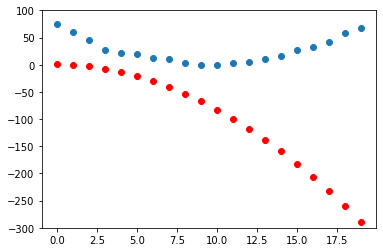

In [ ]:
def show_preds(preds, ax=None):
    if ax is None: ax=plt.subplots()[1]
    ax.scatter(time, speed)
    ax.scatter(time, to_np(preds), color='red')
    ax.set_ylim(-300,100)

show_preds(preds)

In [ ]:
loss = mse(preds, speed)
loss

tensor(160.7062, grad_fn=<SqrtBackward>)

In [ ]:
loss.backward()
params.grad

tensor([-165.5072,  -10.6399,   -0.7901])

In [ ]:
params.grad * 1e-5

tensor([-1.6551e-03, -1.0640e-04, -7.9006e-06])

In [ ]:
params

tensor([-0.7658, -0.7506,  1.3525], requires_grad=True)

In [ ]:
lr = 1e-5
params.data -= lr * params.grad.data #when useing the .data in this calcualtion it does not calcualte the weights
params.grad = None

In [ ]:
preds = f(time,params)
mse(preds, speed)

tensor(160.4311, grad_fn=<SqrtBackward>)

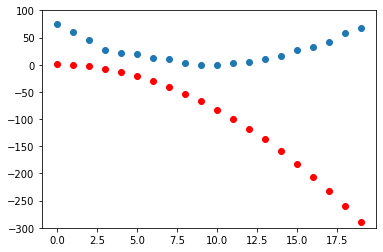

In [ ]:
show_preds(preds)

In [ ]:
def apply_step(params, prn=True):
    preds = f(time, params)
    loss = mse(preds, speed)
    loss.backward()
    params.data -= lr * params.grad.data
    params.grad = None
    if prn: print(loss.item())
    return preds

In [ ]:
for i in range(10): apply_step(params)

160.43112182617188
160.1560821533203
159.88107299804688
159.60609436035156
159.3311309814453
159.05621337890625
158.78131103515625
158.5064239501953
158.2315673828125
157.9567413330078


In [ ]:
params = orig_params.detach().requires_grad_()

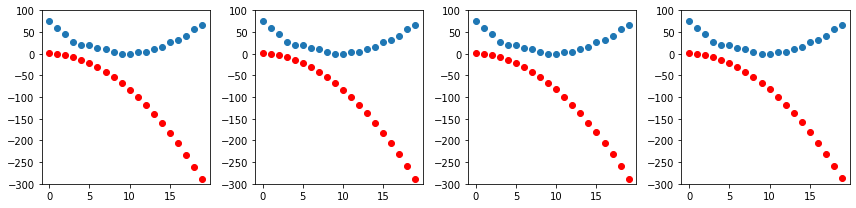

In [ ]:
_,axs = plt.subplots(1,4,figsize=(12,3))
for ax in axs: show_preds(apply_step(params, False), ax)
plt.tight_layout()

MNIST Loss Function

In [ ]:
train_x = torch.cat([stacked_threes, stacked_sevens]).view(-1, 28*28)

In [ ]:
train_y = tensor([1]*len(threes) + [0]*len(sevens)).unsqueeze(1)
train_x.shape,train_y.shape

(torch.Size([12396, 784]), torch.Size([12396, 1]))

In [ ]:
dset = list(zip(train_x,train_y))
x,y = dset[0]
x.shape,y

(torch.Size([784]), tensor([1]))

In [ ]:
valid_x = torch.cat([valid_3_tens, valid_7_tens]).view(-1, 28*28)
valid_y = tensor([1]*len(valid_3_tens) + [0]*len(valid_7_tens)).unsqueeze(1)
valid_dset = list(zip(valid_x,valid_y))

In [ ]:
def init_params(size, std=1.0): return (torch.randn(size)*std).requires_grad_()

In [ ]:
weights = init_params((28*28,1))

MNIST Loss Funtion

x's are going to be pixels

In [ ]:
#torch.cat = concatenate 
#view changes the shape of the tensor without chaning the contents 
#     in view "-1" is a special character that means all the data
train_x = torch.cat([stacked_threes, stacked_sevens]).view(-1, 28*28)

In [ ]:
#label the images
#unsqueeze here turns the vector into a matrix 
train_y = tensor([1]*len(threes) + [0]*len(sevens)).unsqueeze(1)
train_x.shape,train_y.shape

(torch.Size([12396, 784]), torch.Size([12396, 1]))

In [ ]:
# returns a tuple ... zip combines the lists 1 + 1 
dset = list(zip(train_x,train_y))
x,y = dset[0]
x.shape,y

(torch.Size([784]), tensor([1]))

In [ ]:
valid_x = torch.cat([valid_3_tens, valid_7_tens]).view(-1, 28*28)
valid_y = tensor([1]*len(valid_3_tens) + [0]*len(valid_7_tens)).unsqueeze(1)
valid_dset = list(zip(valid_x,valid_y))

In [ ]:
def init_params(size, std=1.0): return (torch.randn(size)*std).requires_grad_()

In [ ]:
#each pixle needs a weight ... 
weights = init_params((28*28,1))

In [ ]:
#weights and bias are the parameters
bias = init_params(1)

In [ ]:
#this is for 1, need to repeat, don't use a for loop
(train_x[0]*weights.T).sum() + bias

tensor([-13.2578], grad_fn=<AddBackward0>)

In [ ]:
def linear1(xb): return xb@weights + bias
preds = linear1(train_x)
preds

tensor([[-13.2578],
        [ -4.6854],
        [-12.4631],
        ...,
        [-12.4171],
        [  2.4253],
        [  1.5262]], grad_fn=<AddBackward0>)

In [ ]:
corrects = (preds>0.5).float() == train_y
corrects

tensor([[False],
        [False],
        [False],
        ...,
        [ True],
        [False],
        [False]])

In [ ]:
#.item in here changes the result from a rank 1 tensor to a number
corrects.float().mean().item()

0.4353823959827423

In [ ]:
with torch.no_grad():
  weights[0] *= 1.0001

In [ ]:
preds = linear1(train_x)
((preds>0.0).float() == train_y).float().mean().item()

0.42739593982696533

In [ ]:
trgts  = tensor([1,0,1])
prds   = tensor([0.9, 0.4, 0.2])

In [ ]:
#trgts  = tensor([1,0,1])
#prds   = 1-tensor([1, 0, 1])

In [ ]:
def mnist_loss(predictions, targets):
    return torch.where(targets==1, 1-predictions, predictions).mean()

In [ ]:
torch.where(trgts==1, 1-prds, prds)

tensor([0.1000, 0.4000, 0.8000])

In [ ]:
#take the mean
mnist_loss(prds,trgts)

tensor(0.4333)

Sigmoid

In [ ]:
def sigmoid(x): return 1/(1+torch.exp(-x))

In [ ]:
math.e

2.718281828459045

In [ ]:
torch.exp(tensor(1.))

tensor(2.7183)

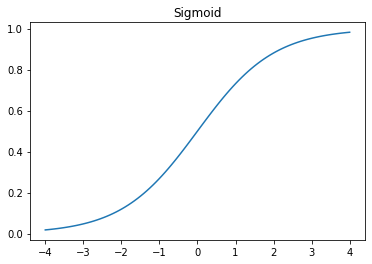

In [ ]:
plot_function(torch.sigmoid, title='Sigmoid', min=-4, max=4)

In [ ]:
def mnist_loss(predictions, targets):
    predictions = predictions.sigmoid()
    return torch.where(targets==1, 1-predictions, predictions).mean()

Data Loaders

In [ ]:
coll = range(30)
dl = DataLoader(coll, batch_size=10, shuffle=True)
list(dl)

[tensor([ 7, 24, 26, 17, 21,  5, 23, 19, 20,  9]),
 tensor([15, 14,  4, 27,  0, 18, 28, 13, 29,  3]),
 tensor([ 2, 11, 12, 22,  1, 10,  8, 25, 16,  6])]

In [ ]:
ds = L(enumerate(string.ascii_lowercase))
ds

(#26) [(0, 'a'),(1, 'b'),(2, 'c'),(3, 'd'),(4, 'e'),(5, 'f'),(6, 'g'),(7, 'h'),(8, 'i'),(9, 'j')...]

In [ ]:
dl = DataLoader(ds, batch_size=6, shuffle=True)
list(dl)

[(tensor([17, 18, 10, 22,  8, 14]), ('r', 's', 'k', 'w', 'i', 'o')),
 (tensor([20, 15,  9, 13, 21, 12]), ('u', 'p', 'j', 'n', 'v', 'm')),
 (tensor([ 7, 25,  6,  5, 11, 23]), ('h', 'z', 'g', 'f', 'l', 'x')),
 (tensor([ 1,  3,  0, 24, 19, 16]), ('b', 'd', 'a', 'y', 't', 'q')),
 (tensor([2, 4]), ('c', 'e'))]

```python
for x,y in dl:                         #for ... in dl returns a tuple, destructure it x,y
    pred = model(x)                    #calculate the prediction
    loss = loss_func(pred, y)          #calculate the loss
    loss.backward()                    #calculate the grad
    parameters -= parameters.grad * lr #update the parameters
```

In [ ]:
# initialise params
weights = init_params((28*28,1))
bias = init_params(1)

In [ ]:
# creat dataloader
dl = DataLoader(dset, batch_size=256)
xb,yb = first(dl)   #grabes the first thing in a the dl
xb.shape,yb.shape

(torch.Size([256, 784]), torch.Size([256, 1]))

In [ ]:
valid_dl = DataLoader(valid_dset, batch_size=256)

In [ ]:
batch = train_x[:4]
batch.shape

torch.Size([4, 784])

In [ ]:
preds = linear1(batch)
preds

tensor([[-6.0345],
        [ 4.8424],
        [-6.8445],
        [-5.8458]], grad_fn=<AddBackward0>)

In [ ]:
loss = mnist_loss(preds, train_y[:4])
loss

tensor(0.7504, grad_fn=<MeanBackward0>)

In [ ]:
loss.backward()
weights.grad.shape,weights.grad.mean(),bias.grad

(torch.Size([784, 1]), tensor(-0.0005), tensor([-0.0035]))

In [ ]:
def calc_grad(xb, yb, model):
    preds = model(xb)
    loss = mnist_loss(preds, yb)
    loss.backward()

In [ ]:
calc_grad(batch, train_y[:4], linear1)
weights.grad.mean(),bias.grad

(tensor(-0.0011), tensor([-0.0070]))

In [ ]:
calc_grad(batch, train_y[:4], linear1)
weights.grad.mean(),bias.grad

(tensor(-0.0016), tensor([-0.0106]))

In [ ]:
calc_grad(batch, train_y[:4], linear1)
weights.grad.mean(),bias.grad

(tensor(-0.0021), tensor([-0.0141]))

In [ ]:
weights.grad.zero_()
bias.grad.zero_();

In [ ]:
def train_epoch(model, lr, params):
    for xb,yb in dl:
        calc_grad(xb, yb, model)
        for p in params:
            p.data -= p.grad*lr
            p.grad.zero_()

In [ ]:
(preds>0.0).float() == train_y[:4]

tensor([[False],
        [ True],
        [False],
        [False]])

In [ ]:
def batch_accuracy(xb, yb):
    preds = xb.sigmoid()
    correct = (preds>0.5) == yb
    return correct.float().mean()

In [ ]:
batch_accuracy(linear1(batch), train_y[:4])

tensor(0.2500)

In [ ]:
def validate_epoch(model):
    accs = [batch_accuracy(model(xb), yb) for xb,yb in valid_dl]
    return round(torch.stack(accs).mean().item(), 4)

In [ ]:
validate_epoch(linear1)

0.4043

In [ ]:
lr = 1.
params = weights,bias
train_epoch(linear1, lr, params)
validate_epoch(linear1)

0.6063

In [ ]:
for i in range(20):
    train_epoch(linear1, lr, params)
    print(validate_epoch(linear1), end=' ')

0.8066 0.8939 0.9237 0.9408 0.9511 0.9545 0.957 0.9584 0.9604 0.9623 0.9633 0.9638 0.9657 0.9667 0.9672 0.9677 0.9677 0.9707 0.9707 0.9721 

In [ ]:
linear_model = nn.Linear(28*28,1)

In [ ]:
w,b = linear_model.parameters()
w.shape,b.shape

(torch.Size([1, 784]), torch.Size([1]))

In [ ]:
class BasicOptim:
    def __init__(self,params,lr): self.params,self.lr = list(params),lr

    def step(self, *args, **kwargs):
        for p in self.params: p.data -= p.grad.data * self.lr

    def zero_grad(self, *args, **kwargs):
        for p in self.params: p.grad = None

In [ ]:
opt = BasicOptim(linear_model.parameters(), lr)

In [ ]:
def train_epoch(model):
    for xb,yb in dl:
        calc_grad(xb, yb, model)
        opt.step()
        opt.zero_grad()

In [ ]:
validate_epoch(linear_model)

0.3647

In [ ]:
def train_model(model, epochs):
    for i in range(epochs):
        train_epoch(model)
        print(validate_epoch(model), end=' ')

In [ ]:
train_model(linear_model, 20)

0.4932 0.8476 0.8286 0.9106 0.9336 0.9472 0.956 0.9614 0.9653 0.9672 0.9692 0.9717 0.9731 0.9746 0.9761 0.9765 0.9775 0.978 0.9785 0.9785 

In [ ]:
linear_model = nn.Linear(28*28,1)
opt = SGD(linear_model.parameters(), lr)
train_model(linear_model, 20)

0.4932 0.8784 0.8232 0.9087 0.9326 0.9487 0.955 0.9619 0.9653 0.9668 0.9692 0.9712 0.9741 0.9751 0.9761 0.9761 0.978 0.978 0.978 0.979 

In [ ]:
dls = DataLoaders(dl, valid_dl) 

In [ ]:
learn = Learner(dls, nn.Linear(28*28,1), opt_func=SGD,
                loss_func=mnist_loss, metrics=batch_accuracy)

In [ ]:
learn.fit(10, lr=lr)

epoch,train_loss,valid_loss,batch_accuracy,time
0,0.636673,0.501062,0.495584,00:00
1,0.285501,0.314162,0.678116,00:00
2,0.114067,0.149121,0.867517,00:00
3,0.055704,0.095189,0.919038,00:00
4,0.033689,0.071907,0.937684,00:00
5,0.024745,0.058754,0.951423,00:00
6,0.020858,0.050384,0.958783,00:00
7,0.018980,0.044713,0.963690,00:00
8,0.017921,0.040664,0.966143,00:00
9,0.017216,0.037641,0.968597,00:00


In [ ]:
def simple_net(xb): 
    res = xb@w1 + b1
    res = res.max(tensor(0.0))
    res = res@w2 + b2
    return res

In [ ]:
w1 = init_params((28*28,30))
b1 = init_params(30)
w2 = init_params((30,1))
b2 = init_params(1)

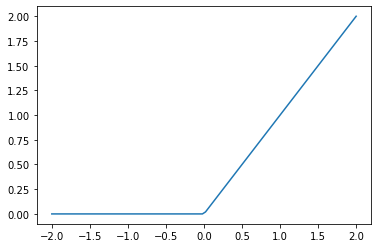

In [ ]:
plot_function(F.relu)

In [ ]:
simple_net = nn.Sequential(
    nn.Linear(28*28,30),
    nn.ReLU(),
    nn.Linear(30,1)
)

In [ ]:
learn = Learner(dls, simple_net, opt_func=SGD,
                loss_func=mnist_loss, metrics=batch_accuracy)

In [ ]:
#hide_output
learn.fit(40, 0.1)

epoch,train_loss,valid_loss,batch_accuracy,time
0,0.347378,0.401283,0.506869,00:00
1,0.156700,0.244920,0.782139,00:00
2,0.085043,0.120720,0.913150,00:00
3,0.054847,0.080137,0.939647,00:00
4,0.041056,0.061969,0.955348,00:00
5,0.034131,0.051872,0.963690,00:00
6,0.030217,0.045568,0.964181,00:00
7,0.027711,0.041296,0.968106,00:00
8,0.025923,0.038219,0.969578,00:00
9,0.024545,0.035893,0.971541,00:00


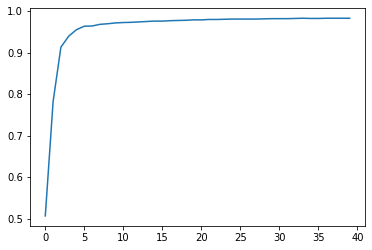

In [ ]:
plt.plot(L(learn.recorder.values).itemgot(2));

In [ ]:
learn.recorder.values[-1][2]

0.982826292514801

In [ ]:
m = learn.model
m

Sequential(
  (0): Linear(in_features=784, out_features=30, bias=True)
  (1): ReLU()
  (2): Linear(in_features=30, out_features=1, bias=True)
)

In [ ]:
w,b = m[0].parameters()

In [ ]:
w.shape

torch.Size([30, 784])

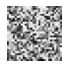

In [ ]:
show_image(w[0].view(28,28))

In [ ]:
dls = ImageDataLoaders.from_folder(path)
learn = cnn_learner(dls, resnet18, pretrained=False,
                    loss_func=F.cross_entropy, metrics=accuracy)
learn.fit_one_cycle(1, 0.1)

epoch,train_loss,valid_loss,accuracy,time
0,0.156408,0.022394,0.995584,00:14


In [ ]:
dls = ImageDataLoaders.from_folder(path)
learn = cnn_learner(dls, resnet18, pretrained=False,
                    loss_func=F.cross_entropy, metrics=accuracy)
learn.fit_one_cycle(2, 0.1)

epoch,train_loss,valid_loss,accuracy,time
0,0.333473,0.037076,0.995584,00:15
1,0.039568,0.014091,0.997547,00:14


Image Classification time stamp 1:09:40 Lesson 4